# Data Characteristics

The dataset chosen for this project is the credit card dataset, download from Kaggle, it contains credit card transactions made on September 2023 by Europian cardholders. The dataset also contains 284,807 transactions between genuine transactions and fraudulents ones, additionaly, this dataset is highly imbalenced, contaning only 492 fraudlent transaction out of the total, 284,807.

For confidendiality protection all the features but 'Time' and 'Amount' where transformed by PCA(Principal Component Analisys), resulting in only numerics variables.

The features on this dataset are: 
Time: That represent the seconds elapsed between transactions.
V1 to V8: Repesent the result os the PCA transformation, representing a linear combinations of the original vareables.
Amount: Containg the transactions amounts.
Class: Being the target that indicates if the transaction is genuine or fraudulent.

This project aims to use this credit card dataset to train a model to detect fradulent transaction.

In [226]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.ensemble import RandomForestClassifier

In [227]:
# Loading the dataset the credit card dataset
df = pd.read_csv('/Users/diegolemos/Masters/DataAnalytics/CA2/creditcard.csv')

In [228]:
# Printing basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [229]:
# Printing the fisrt 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [230]:
# Cheking the number of features and observations.
df.shape

(284807, 31)

As we can see there are 284807 observations and 31 features in the dataset.

In [231]:
# Checking uniques values.
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [232]:
# Printing the statistics for numerics features

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [233]:
# Checking for class imbalance
class_count = df['Class'].value_counts()
print(class_count)

Class
0    284315
1       492
Name: count, dtype: int64


In [234]:
# Checking for class distribution
print(f'Class distribution: \n {df['Class'].value_counts(normalize = True)}')

Class distribution: 
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


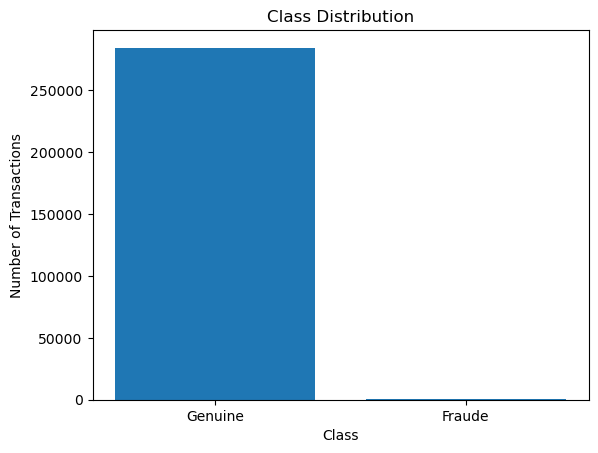

In [235]:
# Visualizing the class distribution
plt.bar(class_count.index, class_count.values, tick_label=['Genuine', 'Fraude'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()

Based on the class distribution we can see how inbaleced is this dataset, as normaly a fraud related dataset is.

# Data Collection and Manipulation

In [236]:
# Checking for missing values.

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no missing values in the dataset.

In [237]:
# Checking the duplicates.
df.duplicated().sum()

1081

As we are dealing if credit card transactions in this dataset, it is normal to have duplicates as amount and other informations can be repited in diferent transaction. But the next step is to chek if the duplication are from error on the data entry of it could be multiple cardholders making similar purchases.

In [238]:
# Checking the nature of the duplicates
duplicates = df[df.duplicated()]
print(duplicates.head())

     Time        V1        V2        V3        V4        V5        V6  \
33   26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35   26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113  74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114  74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115  74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   

           V7        V8        V9  ...       V21       V22       V23  \
33   0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
35   0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
113 -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
114 -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
115 -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   

          V24       V25       V26       V27       V28  Amount  Class  
33   0.001031  0.098816 -0.552904 -0.073288  0.023307    

It seams that there are similarities between the rows 33 and 35, but ther are not completely the same, as 113, 114 and 115, them those columns which are exactly the same will be dropped.

In [239]:
# Checking exactly duplicates
exactly_duplicates = df[df.duplicated()]
print(f'Number of exact duplicates: {len(exactly_duplicates)}')

# Checking for near duplicates
near_duplicates = df[df.duplicated(subset=['Class', 'Amount'], keep=False)]
print(f"Number of near-duplicates: {len(near_duplicates)}")

Number of exact duplicates: 1081
Number of near-duplicates: 268662


It seams the dataset is almost all composed by near duplicates, it could occour due to the PCA transformation, then the will no dropping at thos time.

In [240]:
# Normalizing the 'Amount' column

# Creating a scaler object
scaler = StandardScaler()

df['Normalized_Amount'] = scaler.fit_transform(df[['Amount']])
df.drop(['Amount'], axis = 1, inplace = True)

# Printing the normalized values
print(df['Normalized_Amount'].head())

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Normalized_Amount, dtype: float64


The feature 'Amount' was normalized to ensure all features contributes equally to the models training, avoidind bias against features with larger scales.

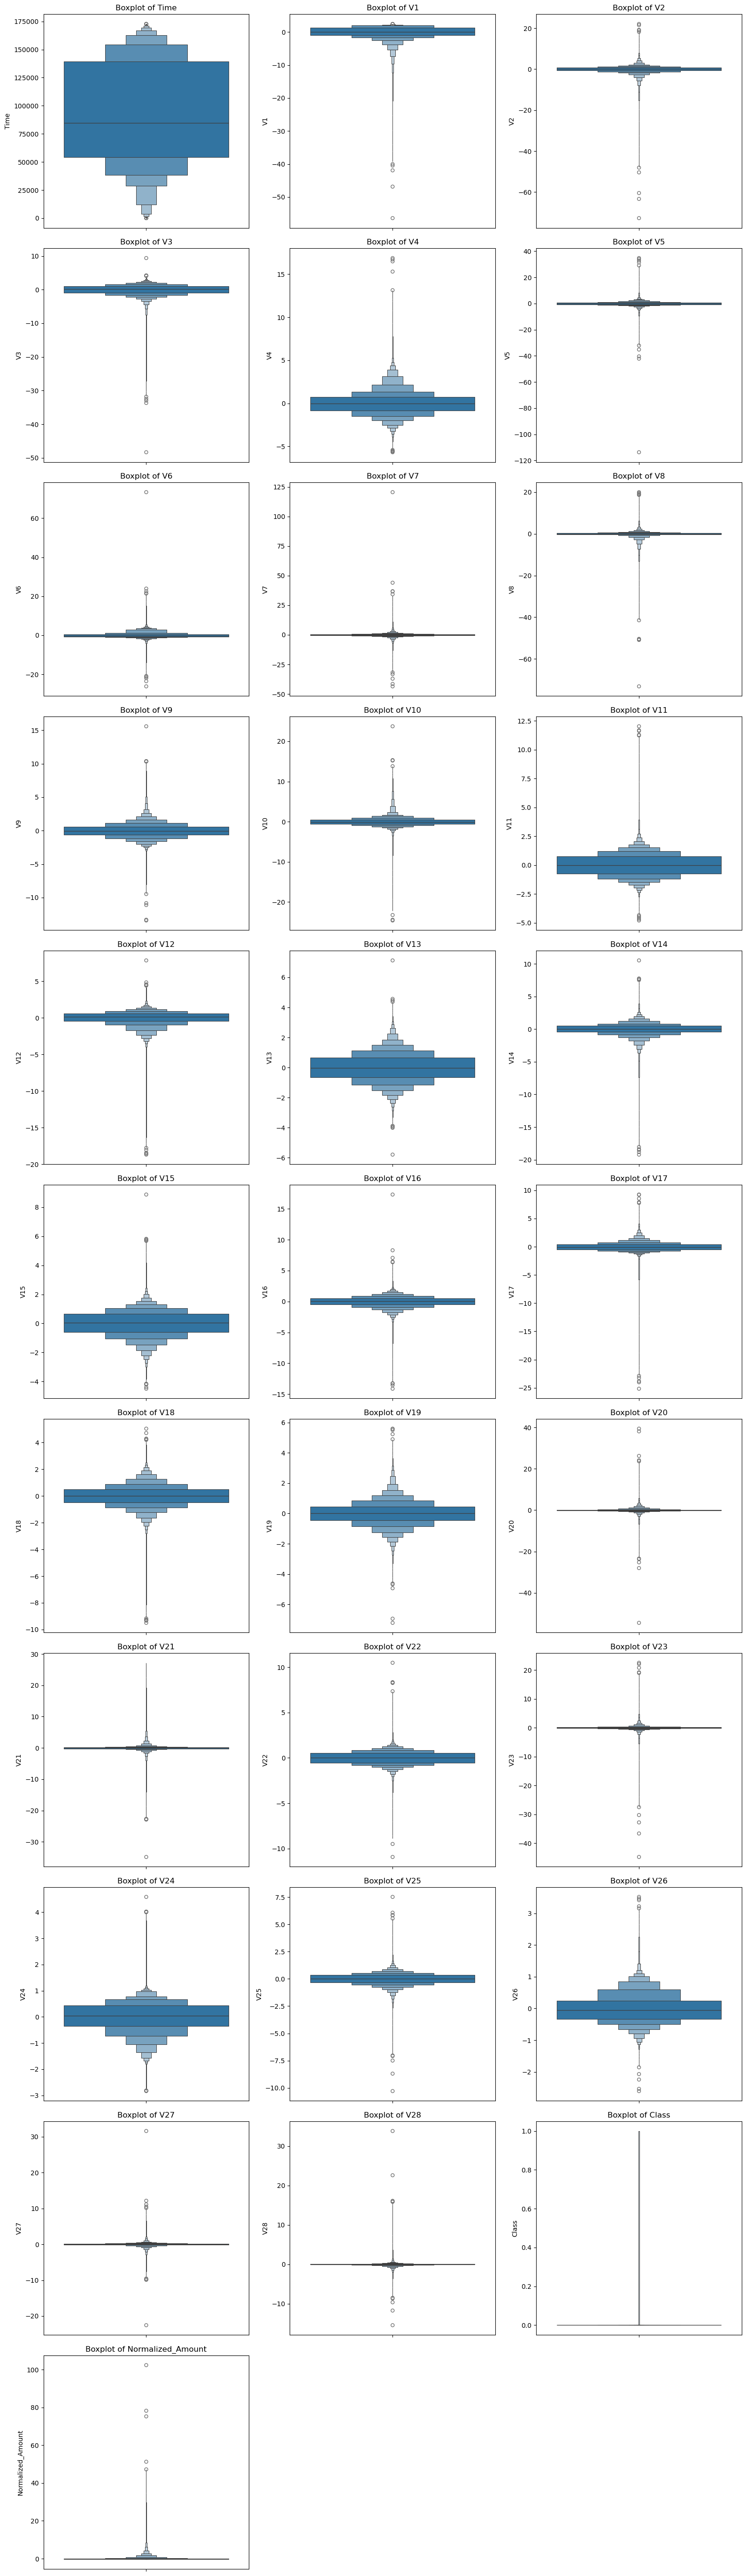

In [241]:
# Checking for outliers using boxplot
columns_numeric = df.select_dtypes(include=['Float64', 'int64'])

# Defining the numbers of columns and rows for the graphics
num_cols = 3
num_plot = len(columns_numeric.columns)
num_rows = (num_plot + num_cols - 1) // num_cols

# Difining figure and axes
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 5 *num_rows))
axs = axs.flatten()

# Looping through the numercs columns
for i, col in enumerate(columns_numeric):
    sns.boxenplot(y=df[col].dropna(), ax=axs[i])
    axs[i].set_title(f"Boxplot of {col}")
    axs[i].set_ylabel(col)
    

# eliminating the axes unutilized
for i in range(num_plot, len(axs)):
    fig.delaxes(axs[i])
    
# Ajusting the layout and plotting
plt.tight_layout()
plt.show()

After plotting the boxplot, it is possible to see many features containing outliers. However, as this dataset will be used to train a model to detect fraud, and the outliers can be point to a fraudulent transection, it will be keeped as it is.

In [242]:
# Defining features (x) and target (y)

x = df.drop(['Class'], axis = 1)
y = df['Class']

# Priting shapes
print(f'Feature shape: {x.shape}')
print(f'Target shape: {y.shape}')

Feature shape: (284807, 30)
Target shape: (284807,)


In [243]:
# Spliting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

# Scaling features
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In this part the data was splited and scaled for a better model performance. 

# Data imbalance

In [244]:
# Applying SMOTE to address class imbalance

smote =  SMOTE(random_state = 42)

# Applying to the data:
x_resampled, y_resampled = smote.fit_resample(x,y)

# Printing the new class distribution

print(f'Class distribution after applying SMOTE: \n {pd.Series(y_resampled).value_counts()}')


Class distribution after applying SMOTE: 
 Class
0    284315
1    284315
Name: count, dtype: int64


To deal with the class imbalance, that is comum on this type of dataset, due to difference between the fraudulent transactions and the real ones, it was used the SMOTE tequinique that oversampled the data, bringuing it to a balance.

# Data Visualization

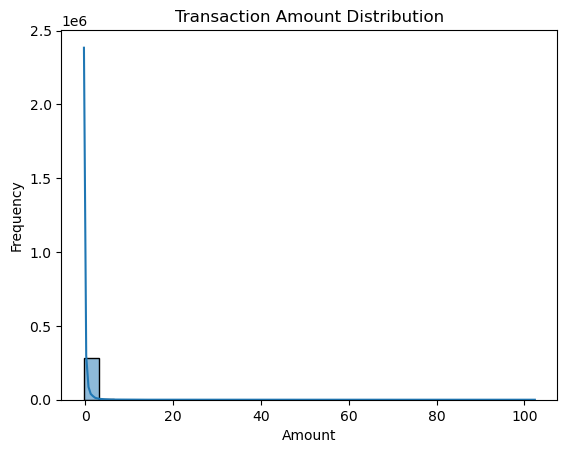

In [245]:
# Visualizing the distribution of the 'Amount' column

sns.histplot(df['Normalized_Amount'], bins = 30, kde = True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

This graphic shows the distribution of trasanctions, for fraudulents and for genuine ones.

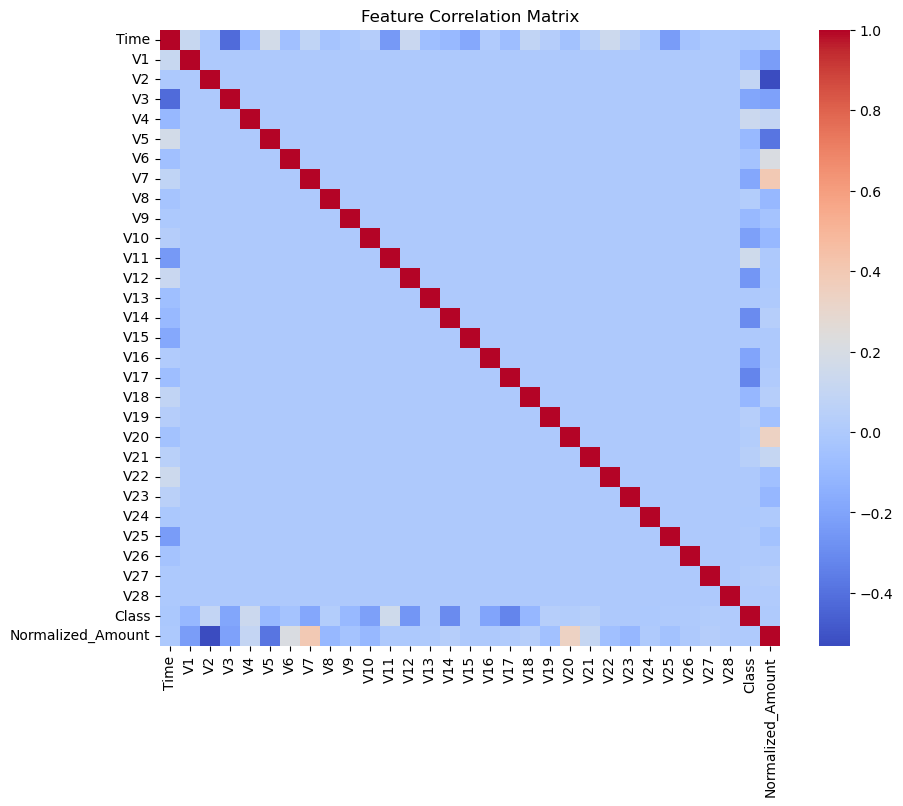

In [246]:
# Correlation Analysis

# calculating Correlation matrix
correlation_matrix = df.corr()

# Ploting a heatmap of correlations
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = False)
plt.title('Feature Correlation Matrix')
plt.show()

On this correlation matrix we can see the strong correlation between features, such as the features V14 and V17 agaist the feature Class.

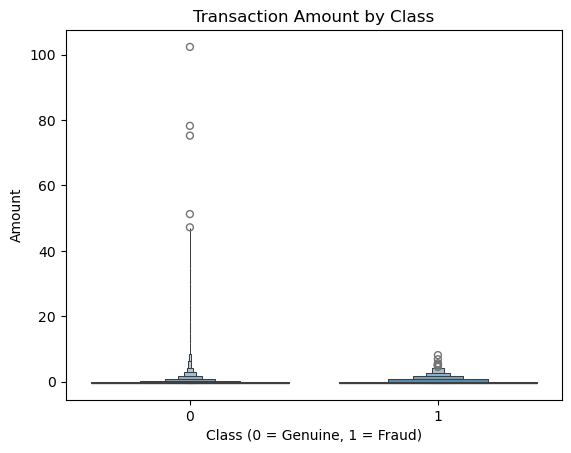

In [247]:
# Feature analysis by class

sns.boxenplot(x='Class', y = 'Normalized_Amount', data = df)
plt.title('Transaction Amount by Class')
plt.xlabel('Class (0 = Genuine, 1 = Fraud)')
plt.ylabel('Amount')
plt.show()

This boxeplot shows the amount in trasnsactions witch was fraudulent and genuine ones.

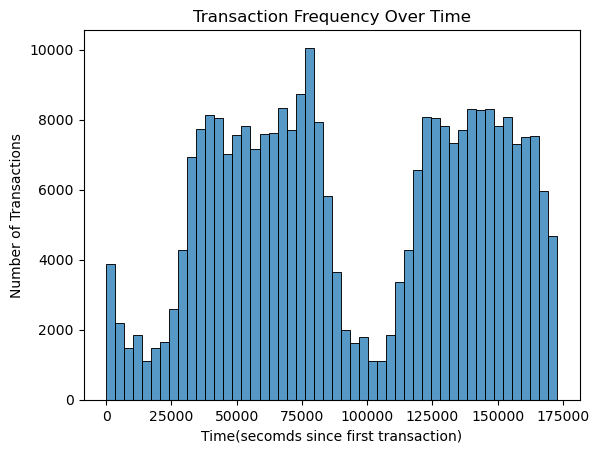

In [248]:
# Time feature analisys
sns.histplot(df['Time'], bins = 50, kde = False)
plt.title('Transaction Frequency Over Time')
plt.xlabel('Time(secomds since first transaction)')
plt.ylabel('Number of Transactions')
plt.show()

The transaction frequency graph shows the pattern over time, such as spikes of anomalies in transactions frequency.

# Data Distribution

In [249]:
# Printing skewness and kurtosis for all features

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        skewness = skew(df[col])
        kurt = kurtosis(df[col])
        print(f'Feature: {col} -- Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}')
    

Feature: Time -- Skewness: -0.04, Kurtosis: -1.29
Feature: V1 -- Skewness: -3.28, Kurtosis: 32.49
Feature: V2 -- Skewness: -4.62, Kurtosis: 95.77
Feature: V3 -- Skewness: -2.24, Kurtosis: 26.62
Feature: V4 -- Skewness: 0.68, Kurtosis: 2.64
Feature: V5 -- Skewness: -2.43, Kurtosis: 206.90
Feature: V6 -- Skewness: 1.83, Kurtosis: 42.64
Feature: V7 -- Skewness: 2.55, Kurtosis: 405.60
Feature: V8 -- Skewness: -8.52, Kurtosis: 220.58
Feature: V9 -- Skewness: 0.55, Kurtosis: 3.73
Feature: V10 -- Skewness: 1.19, Kurtosis: 31.99
Feature: V11 -- Skewness: 0.36, Kurtosis: 1.63
Feature: V12 -- Skewness: -2.28, Kurtosis: 20.24
Feature: V13 -- Skewness: 0.07, Kurtosis: 0.20
Feature: V14 -- Skewness: -2.00, Kurtosis: 23.88
Feature: V15 -- Skewness: -0.31, Kurtosis: 0.28
Feature: V16 -- Skewness: -1.10, Kurtosis: 10.42
Feature: V17 -- Skewness: -3.84, Kurtosis: 94.80
Feature: V18 -- Skewness: -0.26, Kurtosis: 2.58
Feature: V19 -- Skewness: 0.11, Kurtosis: 1.72
Feature: V20 -- Skewness: -2.04, Kurtosi

Theough the Skewness and Kurtosis statistics tecniques, we can see highly skewed features, heavy-tailed features and class distribution.

# Machine Learning

## Logistic Regretion Model

In [250]:
# Training a Logistic Regression Model

# Converting scaled data back to DataFrame as it became a issue on the logistic regretion application
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns = x_test.columns)

# Training logistic Regretion on scaled data
lr = LogisticRegression(class_weight = 'balanced', random_state = 42, max_iter = 500)
lr.fit(x_train_scaled_df, y_train)

# Prediction on the test set
y_pred = lr.predict(x_test_scaled_df)

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Logistic Regretion ROC-AUC Score: 0.97


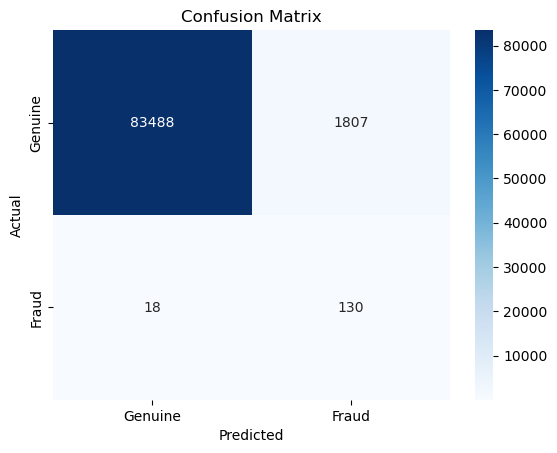

In [251]:
# Evaluating model

# Classification report

print(f'Classification report: \n {classification_report(y_test, y_pred)}')

# AUC-ROC score
y_pred_prob = lr.predict_proba(x_test_scaled_df)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
print(f'Logistic Regretion ROC-AUC Score: {auc:.2f}')

# Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Genuine', 'Fraud'], yticklabels = ['Genuine', 'Fraud']) 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest Model

In [252]:
# Initializing the Random Forest Model
rf = RandomForestClassifier(random_state = 42, n_estimators = 100, max_depth = None)

# Training the model
rf.fit(x_train_scaled, y_train)

# Making the preditions
y_pred_rf = rf.predict(x_test_scaled) 

Random forest classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443
 
Randon Forest ROC-AUC Score: 0.93


<function matplotlib.pyplot.show(close=None, block=None)>

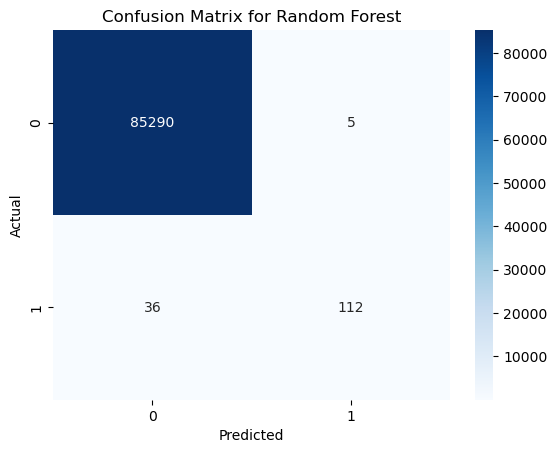

In [253]:
# Evaluating model

# Classification report
print(f'Random forest classification report: \n {classification_report(y_test, y_pred_rf)} ')

# AUC-ROC score
y_pred_prob_rf = rf.predict_proba(x_test_scaled)[:, 1]
auc_ref = roc_auc_score(y_test, y_pred_prob_rf)
print(f'Randon Forest ROC-AUC Score: {auc_ref:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show
